<a href="https://colab.research.google.com/github/osamajalil123/Brain_Tumor_Classification/blob/main/PythonCode/Brain_Tumour_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Loading Modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
import os

# Prepare Data

In [4]:
path=os.listdir('/content/drive/MyDrive/Brain_Tumor_Classification(MRI)/Training')
classes={'no_tumor':0,'pituitary_tumor':1}

In [5]:
import cv2

In [6]:
X=[]
Y=[]
for cls in classes:
    pth='/content/drive/MyDrive/Brain_Tumor_Classification(MRI)/Training/' + cls
    for j in os.listdir(pth):
        img=cv2.imread(pth+'/'+j,0)
        img=cv2.resize(img,(200,200))
        X.append(img)
        Y.append(classes[cls])

In [7]:
np.unique(Y)

array([0, 1])

In [8]:
X=np.array(X)
Y=np.array(Y)

In [9]:
pd.Series(Y).value_counts()

1    827
0    395
dtype: int64

In [10]:
X.shape

(1222, 200, 200)

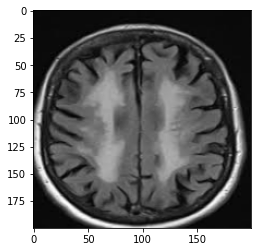

In [11]:
plt.imshow(X[0],cmap='gray')

# Prepare Data

In [12]:
X_updated=X.reshape(len(X),-1)
X_updated.shape

(1222, 40000)

# Splitting Data

In [13]:
xtrain,xtest,ytrain,ytest=train_test_split(X_updated,Y,random_state=10,test_size=.20)

In [14]:
xtrain.shape,xtest.shape

((977, 40000), (245, 40000))

# Feature Scaling

In [15]:
print(xtrain.max(),xtrain.min())
print(xtest.max(),xtest.min())
xtrain=xtrain/255
xtest=xtest/255
print(xtrain.max(),xtrain.min())
print(xtest.max(),xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


# Train Model

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [17]:
import warnings
warnings.filterwarnings('ignore')
lg=LogisticRegression(C=0.1)
lg.fit(xtrain,ytrain)

LogisticRegression(C=0.1)

# Evaluation of LG

In [18]:
print("Testing Score:",lg.score(xtrain,ytrain))
print("Testing Score:",lg.score(xtest,ytest))

Testing Score: 1.0
Testing Score: 0.963265306122449


In [19]:
sv=SVC()
sv.fit(xtrain,ytrain)

SVC()

# Evaluation of SVM

In [20]:
print("Testing Score:",sv.score(xtrain,ytrain))
print("Testing Score:",sv.score(xtest,ytest))

Testing Score: 0.9938587512794268
Testing Score: 0.9714285714285714


In [21]:
pred=sv.predict(xtest)
np.where(ytest!=pred)

(array([  4,  12,  35,  55, 143, 172, 176]),)

In [22]:
pred[5]

1

In [23]:
ytest[5]

1

# Test Model

In [24]:
dec={0:"no_tumor",1:"pituitary_tumor"}

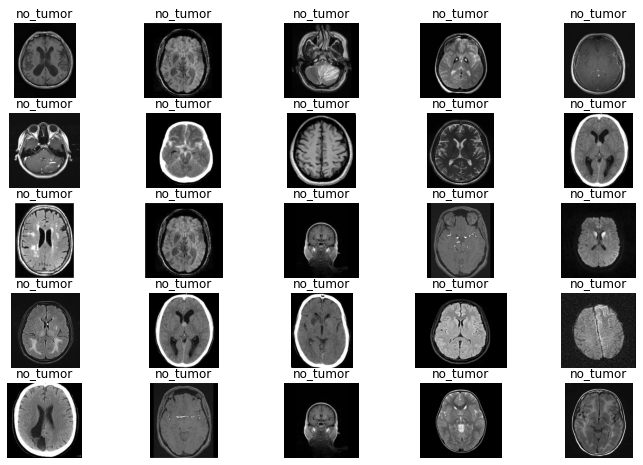

In [25]:
plt.figure(figsize=(12,8))
p=os.listdir('/content/drive/MyDrive/Brain_Tumor_Classification(MRI)/Testing')
c=1
for i in os.listdir('/content/drive/MyDrive/Brain_Tumor_Classification(MRI)/Testing/no_tumor/')[:25]:
  plt.subplot(5,5,c)

  img=cv2.imread('/content/drive/MyDrive/Brain_Tumor_Classification(MRI)/Testing/no_tumor/'+i,0)
  img1=cv2.resize(img,(200,200))
  img1=img1.reshape(1,-1)/255
  p=sv.predict(img1)
  plt.title(dec[p[0]])
  plt.imshow(img,cmap='gray')
  plt.axis('off')
  c+=1


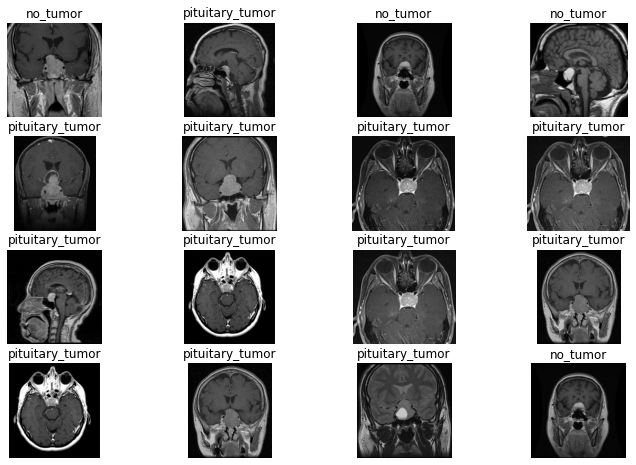

In [26]:
plt.figure(figsize=(12,8))
p=os.listdir('/content/drive/MyDrive/BoneFractureDataset/testing')
c=1
for i in os.listdir('/content/drive/MyDrive/Brain_Tumor_Classification(MRI)/Testing/pituitary_tumor/')[:16]:
  plt.subplot(4,4,c)

  img=cv2.imread('/content/drive/MyDrive/Brain_Tumor_Classification(MRI)/Testing/pituitary_tumor/'+i,0)
  img1=cv2.resize(img,(200,200))
  img1=img1.reshape(1,-1)/255
  p=sv.predict(img1)
  plt.title(dec[p[0]])
  plt.imshow(img,cmap='gray')
  plt.axis('off')
  c+=1
